# Explore here

In [2]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')

df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [5]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_num'] = pd.factorize(df[column])[0]

In [8]:
df2 = df.drop(['COUNTY_NAME','STATE_NAME'], axis = 1)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to STATE_NAME_num
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [10]:
df2.drop_duplicates(inplace=True).reset_index(drop=True)


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to STATE_NAME_num
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [13]:
df2['diabetes_prevalence'].describe()

count    3140.000000
mean       13.073503
std         2.724351
min         6.100000
25%        11.200000
50%        12.800000
75%        14.800000
max        25.600000
Name: diabetes_prevalence, dtype: float64

In [46]:
for column in df2.columns:
    nulos = df2[column].isnull().sum()
    if nulos > 0:
        print(column)

In [39]:
for column in df2.columns:
    if 'diabetes' in column:
        if column != 'diabetes_prevalence':
            print(column)
            df2.drop(column,axis=1,inplace=True)

diabetes_Lower 95% CI
diabetes_Upper 95% CI
diabetes_number


In [40]:
from sklearn.model_selection import train_test_split

X = df2.drop(['diabetes_prevalence'],axis=1)
y = df2['diabetes_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

X_train

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,COUNTY_NAME_num,STATE_NAME_num
1292,26127,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,...,9.6,13.0,2314,3.8,3.5,4.1,771,6,879,22
2302,42121,51266,5272,10.283619,5751,11.217961,5137,10.020286,5341,10.418211,...,8.3,11.5,4097,3.5,3.2,3.8,1454,5,1404,38
761,18133,37779,3915,10.362900,5118,13.547209,6202,16.416528,4363,11.548744,...,7.9,10.4,2792,2.9,2.7,3.1,871,2,327,14
2194,40131,91984,11163,12.135806,12646,13.748043,11595,12.605453,11357,12.346712,...,7.1,9.3,5716,3.0,2.8,3.2,2118,3,1350,36
1241,26025,134487,16698,12.416070,17666,13.135842,17281,12.849569,15993,11.891856,...,8.4,11.0,10002,3.4,3.2,3.6,3490,4,7,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,55093,42555,4478,10.522853,6520,15.321349,6989,16.423452,4822,11.331218,...,4.8,6.6,1914,2.5,2.3,2.7,838,2,413,49
1095,21209,56031,7624,13.606753,7993,14.265317,7669,13.687066,7740,13.813782,...,7.4,10.0,3631,2.6,2.4,2.8,1094,3,155,17
1130,22039,33443,4680,13.993960,4568,13.659062,4778,14.286996,4199,12.555692,...,10.9,13.9,3111,4.0,3.8,4.3,1013,6,763,18
1294,26131,5795,331,5.711821,493,8.507334,335,5.780846,379,6.540121,...,11.1,15.1,661,4.5,4.2,5.0,229,6,881,22


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train,y_train)
xtrain_escalados = scaler.transform(X_train)
xtest_escalados = scaler.transform(X_test)

X_train_esc = pd.DataFrame(xtrain_escalados,index=X_train.index,columns=X_train.columns)
X_test_esc = pd.DataFrame(xtest_escalados,index=X_test.index,columns=X_test.columns)



In [42]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

model_rl = LinearRegression()
model_lasso = Lasso()
model_ridge = Ridge()

model_rl.fit(X_train_esc,y_train)
model_lasso.fit(X_train_esc,y_train)
model_ridge.fit(X_train_esc,y_train)





Ridge()

In [43]:
y_pred_rl = model_rl.predict(X_test_esc)
y_pred_lasso = model_lasso.predict(X_test_esc)
y_pred_ridge = model_ridge.predict(X_test_esc)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"El error de la Regresion Lineal es {mean_squared_error(y_test,y_pred_rl)} y el R2 es de {r2_score(y_test,y_pred_rl)}")
print(f"El error de la Regresion Lasso es {mean_squared_error(y_test,y_pred_lasso)} y el R2 es de {r2_score(y_test,y_pred_lasso)}")
print(f"El error de la Regresion Ridge es {mean_squared_error(y_test,y_pred_ridge)} y el R2 es de {r2_score(y_test,y_pred_ridge)}")


El error de la Regresion Lineal es 0.25817836354237966 y el R2 es de 0.96790084720053
El error de la Regresion Lasso es 1.8878615202766547 y el R2 es de 0.7652833701006369
El error de la Regresion Ridge es 0.2588572990679671 y el R2 es de 0.9678164355756448


In [48]:
y_pred_rl_train = model_rl.predict(X_train_esc)
print(f"El error de la Regresion Lineal es {mean_squared_error(y_train,y_pred_rl_train)} y el R2 es de {r2_score(y_train,y_pred_rl_train)}")

El error de la Regresion Lineal es 0.23911771069764493 y el R2 es de 0.9670581930690917


In [49]:
import numpy as np
var_x = np.linspace(0,20,100)
var_x

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [51]:
r2_alphas = []
for alpha in var_x:
    model = Lasso(alpha=alpha)
    model.fit(X_train_esc,y_train)
    y_pred = model.predict(X_test_esc)
    r2_alphas.append(r2_score(y_test,y_pred))
r2_alphas


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.024e+02, tolerance: 1.823e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

[0.9679869268560505,
 0.9444699014507146,
 0.910426167058793,
 0.8722483261559069,
 0.8225250624558651,
 0.7619492309054263,
 0.6903012358976139,
 0.6062021940326348,
 0.5096056089360977,
 0.40162113740619565,
 0.2927427700598064,
 0.17235812077999413,
 0.04046718956675788,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,


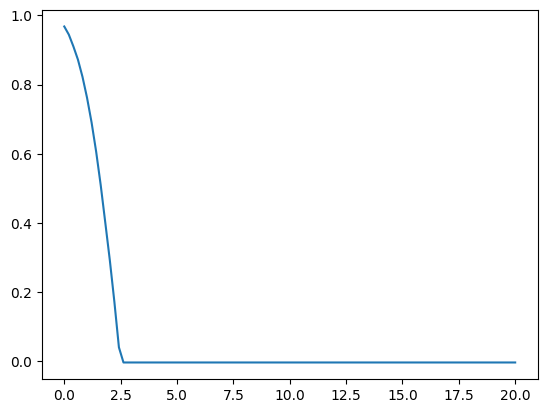

In [52]:
import matplotlib.pyplot as plt

plt.plot(var_x,r2_alphas)
plt.show()


In [53]:
model_lasso.coef_

array([-0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.0060195 ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [56]:
df.columns[93]

'Heart disease_Upper 95% CI'